In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
def costfunction(X,y,theta):
    '''Cost function for linear regression'''
    #Initialization of useful values 
    m = np.size(y)
    
    #Vectorized implementation
    h = X @ theta
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return J;


def costFunctionReg(X,y,theta,lamda = 10):
    '''Cost function for ridge regression (regularized L2)'''
    #Initialization
    m = len(y) 
    J = 0
    
    #Vectorized implementation
    h = X @ theta
    J_reg = (lamda / (2*m)) * np.sum(np.square(theta))
    J = float((1./(2*m)) * (h - y).T @ (h - y)) + J_reg;
    return(J) 


def gradient_descent(X,y,theta,alpha = 0.0005,num_iters=1000):
    '''Gradient descent for linear regression'''
    #Initialisation of useful values 
    m = np.size(y)
    J_history = np.zeros(num_iters)
    theta_0_hist, theta_1_hist = [], [] #For plotting afterwards
    
    for i in range(num_iters):
        #Cost and intermediate values for each iteration
        J_history[i] = costfunction(X,y,theta)
        theta_0_hist.append(theta[0,0])
        theta_1_hist.append(theta[1,0])
        
        #Grad function in vectorized form
        h = X @ theta
        gradient = (1/m)*(X.T @ (h-y))
        theta = theta - alpha * gradient       
    return theta,J_history, theta_0_hist, theta_1_hist

def gradient_descent_reg(X,y,theta,alpha = 0.0005,lamda = 10,num_iters=1000):
    '''Gradient descent for ridge regression'''
    #Initialisation of useful values 
    m = np.size(y)
    J_history = np.zeros(num_iters)
    theta_0_hist, theta_1_hist = [], [] #Used for three D plot

    for i in range(num_iters):
        #Hypothesis function
        h = np.dot(X,theta)
        
        #Grad function in vectorized form
        theta = theta - alpha * (1/m)* (  (X.T @ (h-y)) + lamda * theta )
           
        #Cost function in vectorized form       
        J_history[i] = costFunctionReg(X,y,theta,lamda)
           
        #Calculate the cost for each iteration(used to plot convergence)
        theta_0_hist.append(theta[0,0])
        theta_1_hist.append(theta[1,0])   
    return theta ,J_history, theta_0_hist, theta_1_hist

def closed_form_solution(X,y):
    '''Closed form solution for linear regression'''
    return np.linalg.inv(X.T @ X) @ X.T @ y
    
def closed_form_reg_solution(X,y,lamda = 10): 
    '''Closed form solution for ridge regression'''
    m,n = X.shape
    I = np.eye((n))
    return (np.linalg.inv(X.T @ X + lamda * I) @ X.T @ y)[:,0]

def cost_l2(x,y):
    return x**2 + y**2

def cost_l1(x,y):
    return np.abs(x) + np.abs(y)

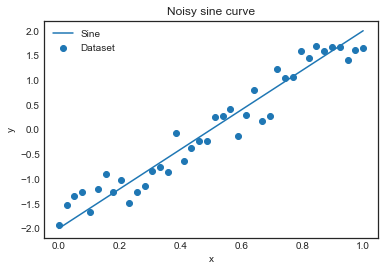

In [15]:
#Generating sine curve and uniform noise
x = np.linspace(0,1,40)
noise = 1*np.random.uniform(  size = 40)

y = 4*x + 5
# y = np.sin(x * 1.5 * np.pi ) 
y_noise = (y + noise).reshape(-1,1)

#Centering the y data
y_noise = y_noise - y_noise.mean()

#Design matrix is x, x^2
X = np.vstack((2*x,x**2)).T

#Nornalizing the design matrix to facilitate visualization
X = X / np.linalg.norm(X,axis = 0)

#Plotting the result
plt.scatter(x,y_noise, label = 'Dataset')
plt.plot(x,y - y.mean(),label = 'Sine')
plt.title('Noisy sine curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

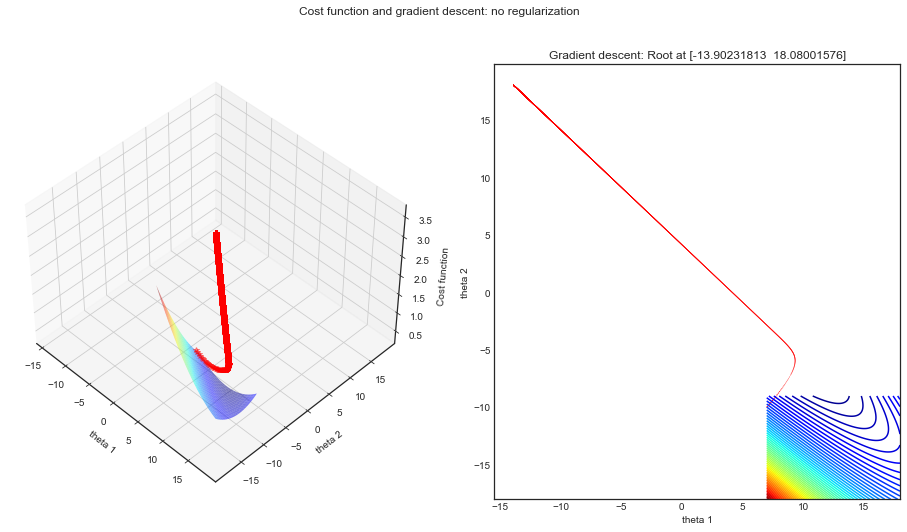

In [16]:
#Setup of meshgrid of theta values
T0, T1 = np.meshgrid(np.linspace(7,18,100),np.linspace(-18,-9,100))

#Computing the cost function for each theta combination
zs = np.array(  [costfunction(X, y_noise.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )
#Reshaping the cost values    
Z = zs.reshape(T0.shape)


#Computing the gradient descent
theta_result,J_history, theta_0, theta_1 = gradient_descent(X,y_noise,np.array([7,-10]).reshape(-1,1),alpha = 1,num_iters=5000)

#Angles needed for quiver plot
anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1]
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_0,theta_1,J_history, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')
ax.set_zlabel('Cost function')
ax.view_init(45, -45)

#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 70, cmap = 'jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')
ax.set_title('Gradient descent: Root at {}'.format(theta_result.ravel()))

plt.suptitle('Cost function and gradient descent: no regularization')
plt.show()


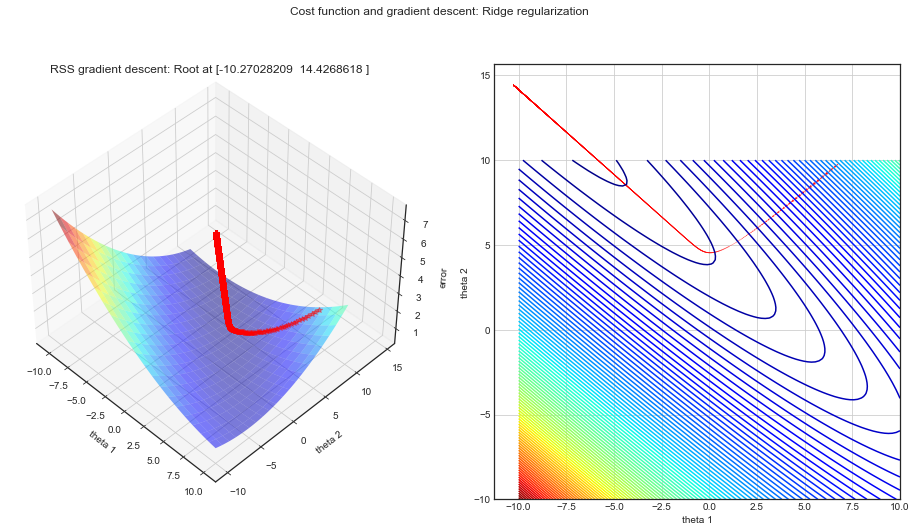

In [17]:
l = 0.01

#Setup of meshgrid of theta values
T1, T2 = np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))

#Computing the cost function for each theta combination
zs = np.array(  [costFunctionReg(X, y_noise.reshape(-1,1),np.array([t1,t2]).reshape(-1,1),l) 
                     for t1, t2 in zip(np.ravel(T1), np.ravel(T2)) ] )
#Reshaping the cost values    
Z = zs.reshape(T1.shape)


#Computing the gradient descent
theta_result_reg,J_history_reg, theta_0, theta_1 = gradient_descent_reg(X,y_noise,np.array([7.,10.]).reshape(-1,1), 0.8,l,num_iters=5000)


#Angles needed for quiver plot
anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1]
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T1, T2, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_0,theta_1,J_history_reg, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')
ax.set_zlabel('error')
ax.set_title('RSS gradient descent: Root at {}'.format(theta_result_reg.ravel()))
ax.view_init(45, -45)


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(T1, T2, Z, 100, cmap = 'jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')

plt.grid()
plt.suptitle('Cost function and gradient descent: Ridge regularization')
plt.show()